In [9]:
# Data loading
from sklearn.datasets import load_diabetes

In [10]:
help(load_diabetes)

Help on function load_diabetes in module sklearn.datasets._base:

load_diabetes(*, return_X_y=False, as_frame=False, scaled=True)
    Load and return the diabetes dataset (regression).

    ==============   ==================
    Samples total    442
    Dimensionality   10
    Features         real, -.2 < x < .2
    Targets          integer 25 - 346
    ==============   ==================

    .. note::
       The meaning of each feature (i.e. `feature_names`) might be unclear
       (especially for `ltg`) as the documentation of the original dataset is
       not explicit. We provide information that seems correct in regard with
       the scientific literature in this field of research.

    Read more in the :ref:`User Guide <diabetes_dataset>`.

    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.

        .. versionadded:

In [93]:
X, y = load_diabetes(return_X_y=True)

In [94]:
print(type(y))
print(y.shape)
print(y[:5])

<class 'numpy.ndarray'>
(442,)
[151.  75. 141. 206. 135.]


In [95]:
df = load_diabetes()

In [96]:
print(type(df))

<class 'sklearn.utils._bunch.Bunch'>


In [97]:
print(X.shape)
print(X[:5])
X = X[:, [2]]  # use only one feature
print(X.shape)
print(X[:5])

(442, 10)
[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
(442, 1)
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


In [104]:
# Descriptive analysis
from statsmodels.api import OLS

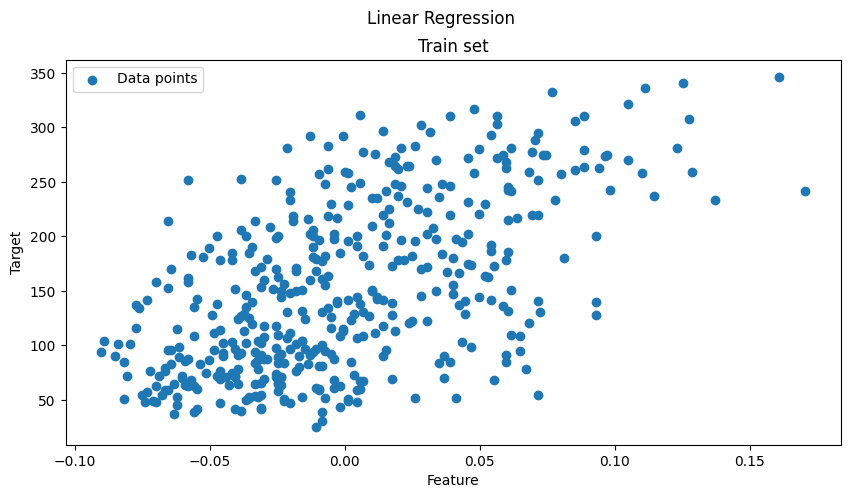

In [105]:
fig, ax = plt.subplots(ncols=1, figsize=(10, 5), sharex=True, sharey=True)

# Plot 1
ax.scatter(X, y, label='Data points')
ax.set(xlabel='Feature', ylabel='Target', title='Train set')
ax.legend()

fig.suptitle('Linear Regression')
plt.show()

In [106]:
model = OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.070
Model:                            OLS   Adj. R-squared (uncentered):              0.068
Method:                 Least Squares   F-statistic:                              33.27
Date:                Thu, 06 Feb 2025   Prob (F-statistic):                    1.51e-08
Time:                        11:10:48   Log-Likelihood:                         -2882.5
No. Observations:                 442   AIC:                                      5767.
Df Residuals:                     441   BIC:                                      5771.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [17]:
# Data preparation
from sklearn.model_selection import train_test_split

In [18]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None
)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(422, 1) (20, 1) (422,) (20,)


In [24]:
# Linear regression
from sklearn.linear_model import LinearRegression

In [25]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(
 |      *,
 |      fit_intercept=True,
 |      copy_X=True,
 |      n_jobs=None,
 |      positive=False
 |  )
 |
 |  Ordinary least squares Linear Regression.
 |
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |
 |  n_jobs : int, default=None
 |      The number of jobs to use for the comp

In [32]:
# Fit linear regression model with training data
regressor = LinearRegression().fit(X_train, y_train)

In [30]:
regressor.coef_

array([938.23786125])

In [31]:
# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
y_pred = regressor.predict(X_test)
print(y_pred.shape)

(20,)


In [36]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared_error: {mse}')

Mean squared_error: 2548.0723987259694


In [39]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared, coefficient of determination: {r2:.2f}')

R-squared, coefficient of determination: 0.47


In [42]:
# Plotting results for visualization
import matplotlib.pyplot as plt

In [43]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(
    nrows: 'int' = 1,
    ncols: 'int' = 1,
    *,
    sharex: "bool | Literal['none', 'all', 'row', 'col']" = False,
    sharey: "bool | Literal['none', 'all', 'row', 'col']" = False,
    squeeze: 'bool' = True,
    width_ratios: 'Sequence[float] | None' = None,
    height_ratios: 'Sequence[float] | None' = None,
    subplot_kw: 'dict[str, Any] | None' = None,
    gridspec_kw: 'dict[str, Any] | None' = None,
    **fig_kw
) -> 'tuple[Figure, Any]'
    Create a figure and a set of subplots.

    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.

    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.

    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:

        - T

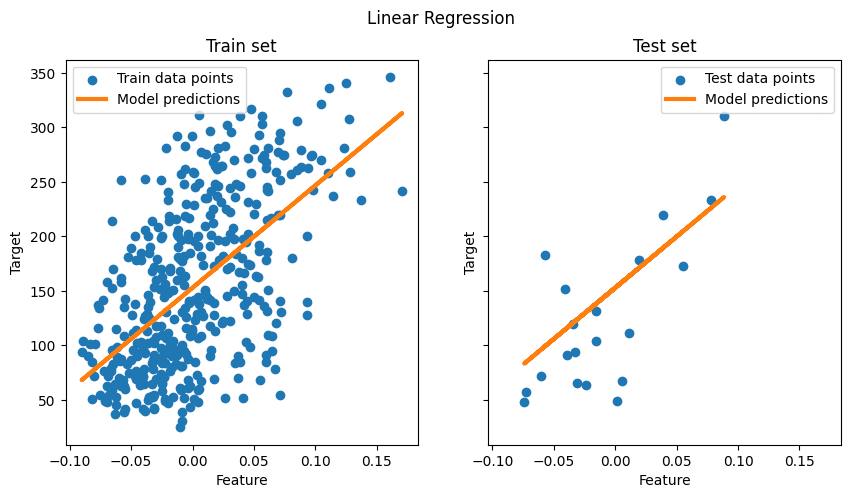

In [72]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

# Plot 1
ax[0].scatter(X_train, y_train, lacbel='Train data points')
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color='tab:orange',
    label='Model predictions'
)
ax[0].set(xlabel='Feature', ylabel='Target', title='Train set')
ax[0].legend()

# Plot 2
ax[1].scatter(X_test, y_test, label='Test data points')
ax[1].plot(X_test, y_pred, linewidth=3, color='tab:orange', label='Model predictions')
ax[1].set(xlabel='Feature', ylabel='Target', title='Test set')
ax[1].legend()

fig.suptitle('Linear Regression')
plt.show()